# Download Dataset

In [1]:
!gdown --id 1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l

^C


In [2]:
!unzip dataset.zip

^C


In [1]:
import pathlib
data_dir = pathlib.Path("./flowers")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


# Load dataset

In [2]:
import cv2
import numpy as np
import os

dataset = []
count = 0
for label in os.listdir("./flowers/"):
    for filename in os.listdir(os.path.join("./flowers/",label)):
        count = count + 1
        print(str(count) + " ---loading " + filename)
        image = cv2.imread(os.path.join("./flowers/",label,filename))
        dataset.append((image, label))

1 ---loading 100080576_f52e8ee070_n.jpg
2 ---loading 10140303196_b88d3d6cec.jpg
3 ---loading 10172379554_b296050f82_n.jpg
4 ---loading 10172567486_2748826a8b.jpg
5 ---loading 10172636503_21bededa75_n.jpg
6 ---loading 102841525_bd6628ae3c.jpg
7 ---loading 10300722094_28fa978807_n.jpg
8 ---loading 1031799732_e7f4008c03.jpg
9 ---loading 10391248763_1d16681106_n.jpg
10 ---loading 10437754174_22ec990b77_m.jpg
11 ---loading 10437770546_8bb6f7bdd3_m.jpg
12 ---loading 10437929963_bc13eebe0c.jpg
13 ---loading 10466290366_cc72e33532.jpg
14 ---loading 10466558316_a7198b87e2.jpg
15 ---loading 10555749515_13a12a026e.jpg
16 ---loading 10555815624_dc211569b0.jpg
17 ---loading 10555826524_423eb8bf71_n.jpg
18 ---loading 10559679065_50d2b16f6d.jpg
19 ---loading 105806915_a9c13e2106_n.jpg
20 ---loading 10712722853_5632165b04.jpg
21 ---loading 107592979_aaa9cdfe78_m.jpg
22 ---loading 10770585085_4742b9dac3_n.jpg
23 ---loading 10841136265_af473efc60.jpg
24 ---loading 10993710036_2033222c91.jpg
25 ---loadin

In [3]:
import random
print(random.sample(dataset, 10))

[(array([[[ 82, 142, 112],
        [ 65, 126,  88],
        [ 48, 113,  64],
        ...,
        [ 30, 118, 102],
        [ 14,  97,  75],
        [  7,  82,  54]],

       [[ 19, 113,  54],
        [ 52, 143,  94],
        [ 71, 155, 120],
        ...,
        [ 21,  86,  61],
        [ 25,  79,  50],
        [ 20,  69,  37]],

       [[  1, 104,  46],
        [  0, 100,  44],
        [  0,  95,  41],
        ...,
        [ 26,  84,  60],
        [ 35,  80,  54],
        [ 26,  74,  45]],

       ...,

       [[  0, 117,  64],
        [  0, 114,  60],
        [  2, 117,  54],
        ...,
        [ 26, 132, 103],
        [ 60, 175, 142],
        [ 76, 169, 138]],

       [[  2, 114,  60],
        [  1, 112,  58],
        [  2, 112,  46],
        ...,
        [  3,  75,  52],
        [ 64, 160, 130],
        [ 72, 175, 144]],

       [[  5, 116,  60],
        [  4, 110,  57],
        [  0, 107,  38],
        ...,
        [ 18,  57,  36],
        [ 19, 115,  85],
        [ 54, 185, 152

In [4]:
import random
random.shuffle(dataset)

# Display dataset

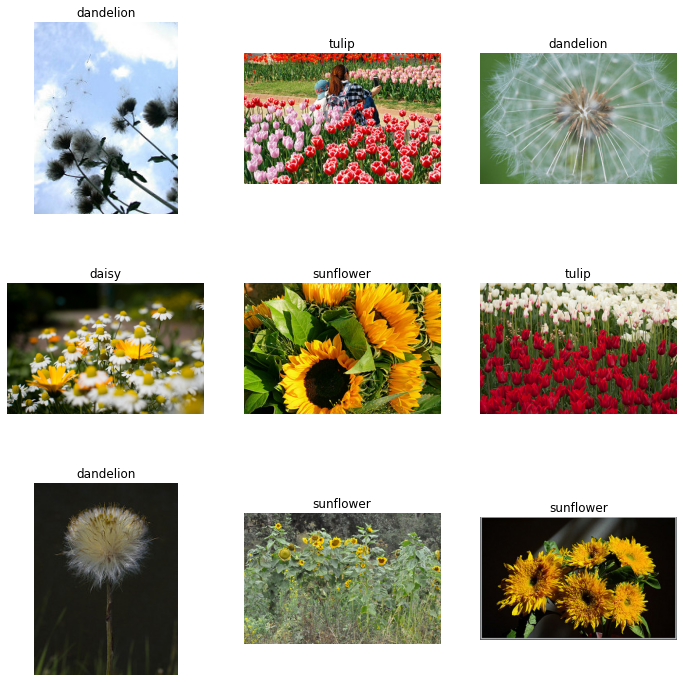

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(dataset[i][0][:,:,::-1])
    ax.axis('off')
    ax.set_title(dataset[i][1])
plt.show()

# Define Feature Extractor

## Raw pixel values

In [6]:
import cv2
def image_to_feature_vector(image, size=(32, 32)):
    return cv2.resize(image, size).flatten()

## Histogram

In [7]:
import imutils
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    cv2.normalize(hist,hist)
    return hist.flatten()

# Feature extraction

In [8]:
rawImages = []
features = []
labels = []

In [9]:
labels_classes_mapping = {"daisy":0, "dandelion":1, "rose":2, "sunflower":3, "tulip":4}
for (image, label) in dataset:
    rawImages.append(image_to_feature_vector(image))
    features.append(extract_color_histogram(image))
    labels.append(labels_classes_mapping[label])


In [10]:
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print(rawImages.shape)
print(features.shape)
print(labels.shape)

(4317, 3072)
(4317, 512)
(4317,)


# Split Train/Test

In [11]:
from sklearn.model_selection import train_test_split
(trainRawX, testRawX, trainRawY, testRawY) = train_test_split(rawImages, labels, test_size=0.25, random_state=42)
(trainFeatX, testFeatX, trainFeatY, testFeatY) = train_test_split(features, labels, test_size=0.25, random_state=42)

# KNN 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
model.fit(trainRawX, trainRawY)
acc = model.score(testRawX, testRawY)
print("raw pixel accuracy: {:.2f}%".format(acc * 100))

raw pixel accuracy: 29.26%


In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)
model.fit(trainFeatX, trainFeatY)
acc = model.score(testFeatX, testFeatY)
print("histogram accuracy: {:.2f}%".format(acc * 100))

histogram accuracy: 46.11%
